In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv('/content/AEP_hourly.csv')
df.head()
df.tail()
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2004-12-31 01:00:00', '2004-12-31 02:00:00',
               '2004-12-31 03:00:00', '2004-12-31 04:00:00',
               '2004-12-31 05:00:00', '2004-12-31 06:00:00',
               '2004-12-31 07:00:00', '2004-12-31 08:00:00',
               '2004-12-31 09:00:00', '2004-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=121273, freq=None)

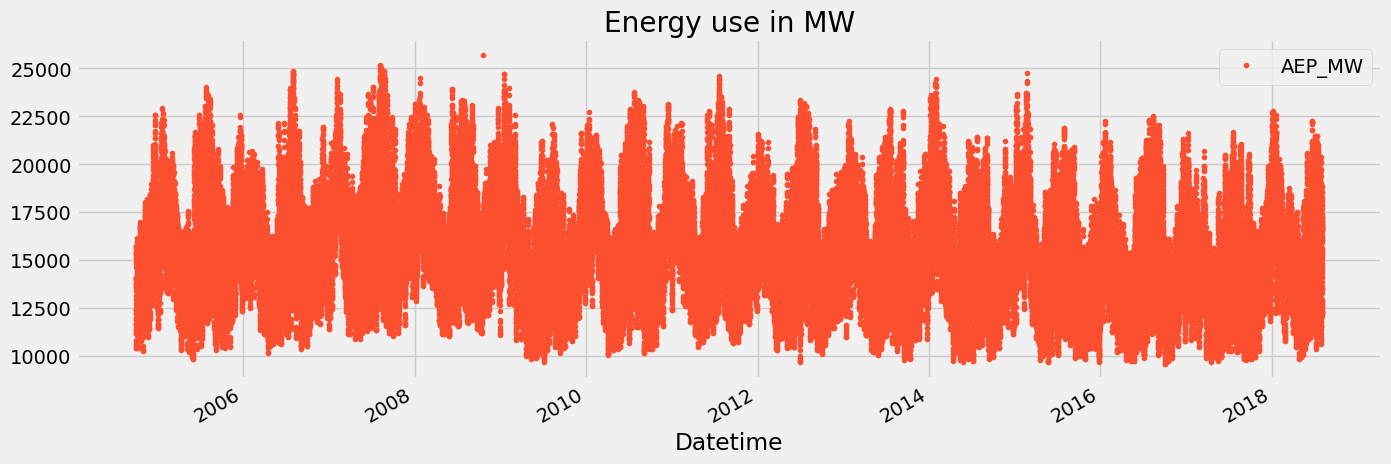

In [ ]:
#colour palette from sea born
cl_pl = sns.color_palette()
plt.style.use('fivethirtyeight')
df.plot(style='.', figsize = (15, 5), color = cl_pl[1], title = "Energy use in MW")
plt.show()


In [ ]:
## splitting data into train/test data


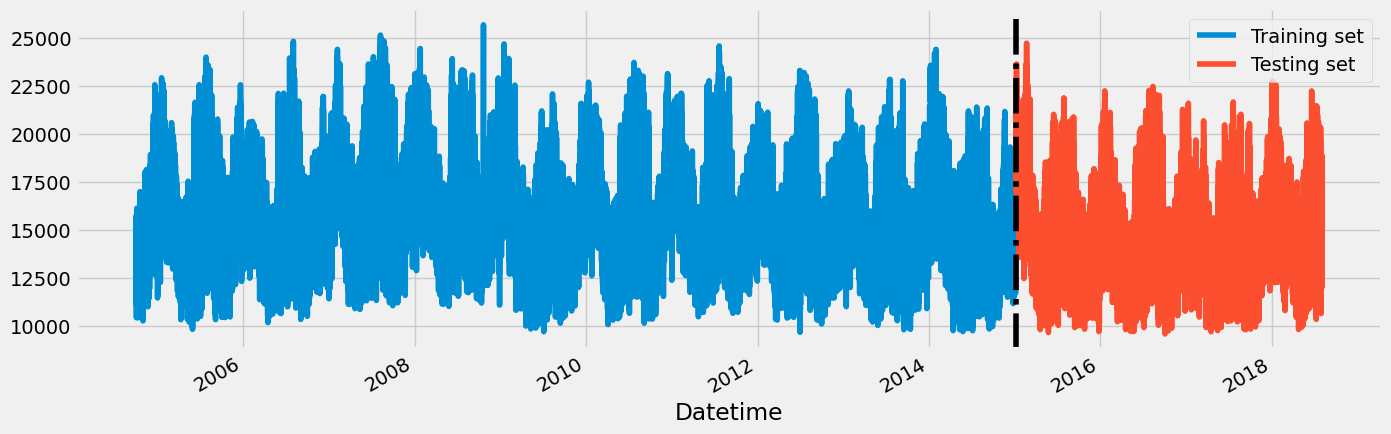

In [ ]:
train = df.loc[df.index < '01-06-2015']
test = df.loc[df.index >= '01-06-2015']
fig, ax = plt.subplots(figsize = (15, 5))

train.plot(ax = ax , label = "Training set")
test.plot(ax = ax, label = "Testing set")

ax.axvline('01-06-2015', color = 'black' ,ls = '-.')
ax.legend(['Training set', 'Testing set'])

plt.show()

In [ ]:

##  Features: creating time series features based on time series index.


def creation_features(df):

  df = df.copy()
  df['hour'] = df.index.hour
  df['day_of_week'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['day_of_year'] = df.index.dayofyear
  return df

df = creation_features(df)

Text(0.5, 1.0, 'MW by hour')

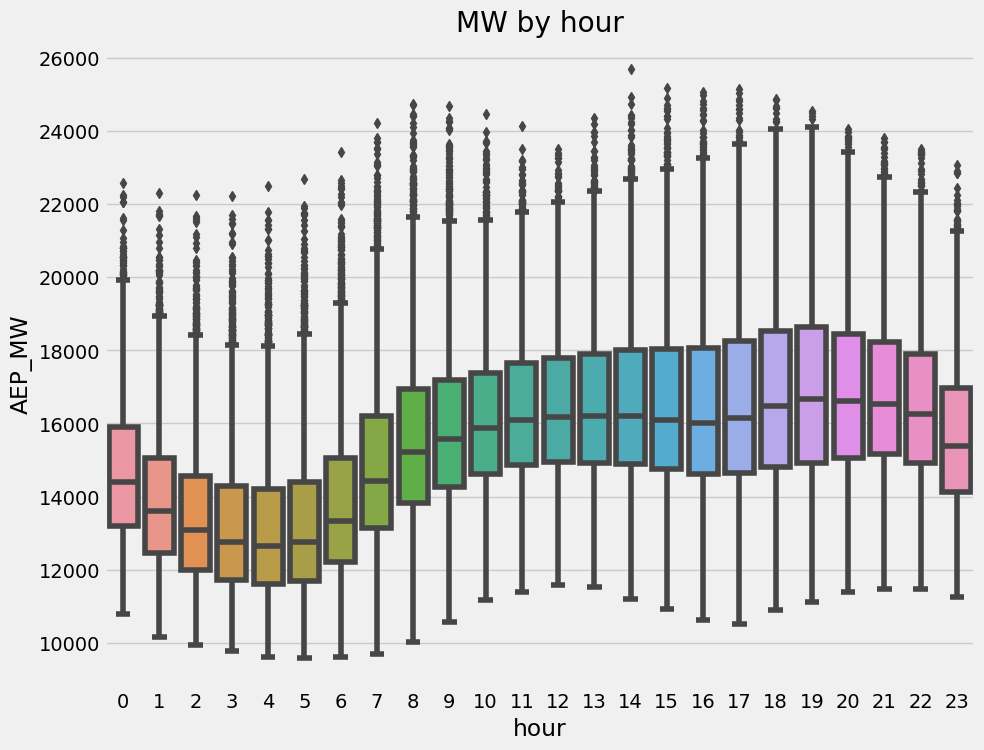

In [ ]:
## visualizing feature / target relationship
fig , ax = plt.subplots(figsize = (10, 8))
sns.boxplot(data=df, x='hour', y='AEP_MW')
ax.set_title('MW by hour')

Text(0.5, 1.0, 'MW by year')

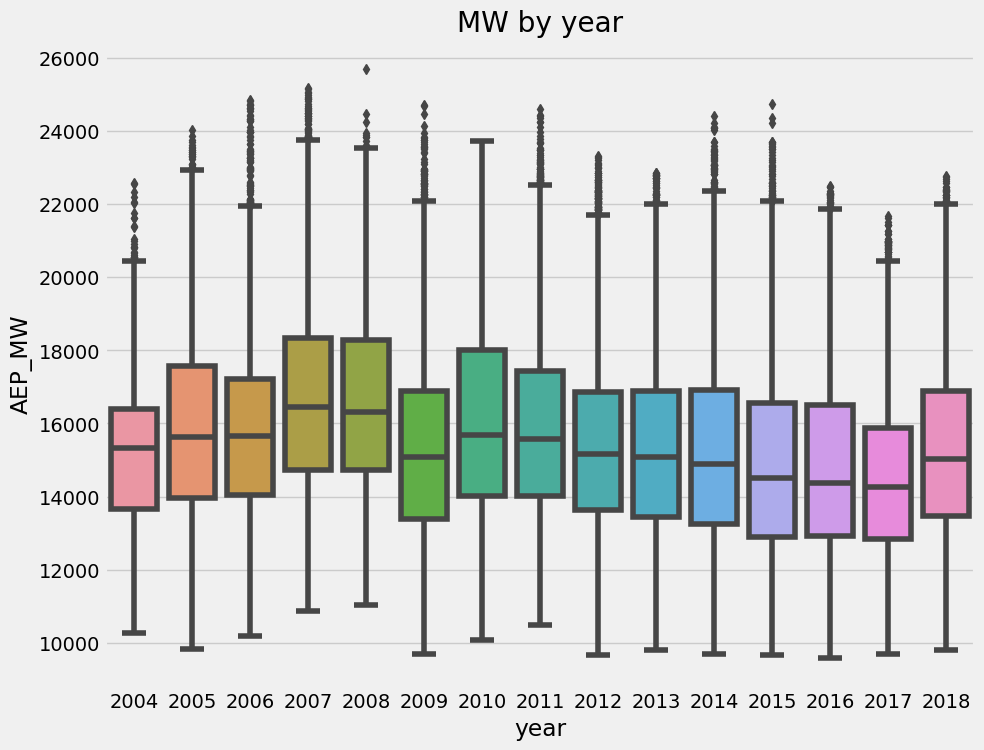

In [ ]:
fig , ax = plt.subplots(figsize = (10, 8))
sns.boxplot(data=df, x='year', y='AEP_MW')
ax.set_title('MW by year')

In [ ]:
train = creation_features(train)
test = creation_features(test)

<ipython-input-44-78683359417e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
<ipython-input-44-78683359417e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df.index.dayofweek
<ipython-input-44-78683359417e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [ ]:
FEATURES = ['hour', 'day_of_week', 'quarter', 'month', 'year',
       'day_of_year']
TARGET = 'AEP_MW'

X_train = train[FEATURES]
Y_train = train[TARGET]

X_test = test[FEATURES]
Y_test = test[TARGET]

In [ ]:
from __future__ import nested_scopes
## Model creation



reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(X_train, Y_train,
        eval_set= [(X_train, Y_train), (X_test, Y_test)],

        verbose = 50
        )


[0]	validation_0-rmse:2556.26479	validation_1-rmse:2672.25879
[50]	validation_0-rmse:1967.00861	validation_1-rmse:2153.04823
[100]	validation_0-rmse:1666.83857	validation_1-rmse:1909.71976
[150]	validation_0-rmse:1499.04842	validation_1-rmse:1789.61737
[200]	validation_0-rmse:1387.32960	validation_1-rmse:1721.74983
[250]	validation_0-rmse:1316.36162	validation_1-rmse:1681.78945
[300]	validation_0-rmse:1261.41533	validation_1-rmse:1659.38527
[350]	validation_0-rmse:1212.18827	validation_1-rmse:1646.39438
[400]	validation_0-rmse:1171.84057	validation_1-rmse:1639.22091
[450]	validation_0-rmse:1140.86967	validation_1-rmse:1626.13121
[500]	validation_0-rmse:1114.57815	validation_1-rmse:1614.97081
[550]	validation_0-rmse:1090.70792	validation_1-rmse:1624.01547
[562]	validation_0-rmse:1085.66145	validation_1-rmse:1627.41611


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

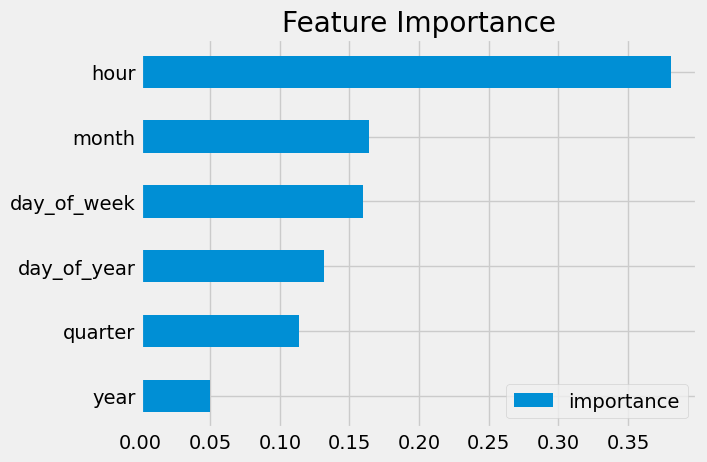

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

<ipython-input-62-4557fcc57936>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


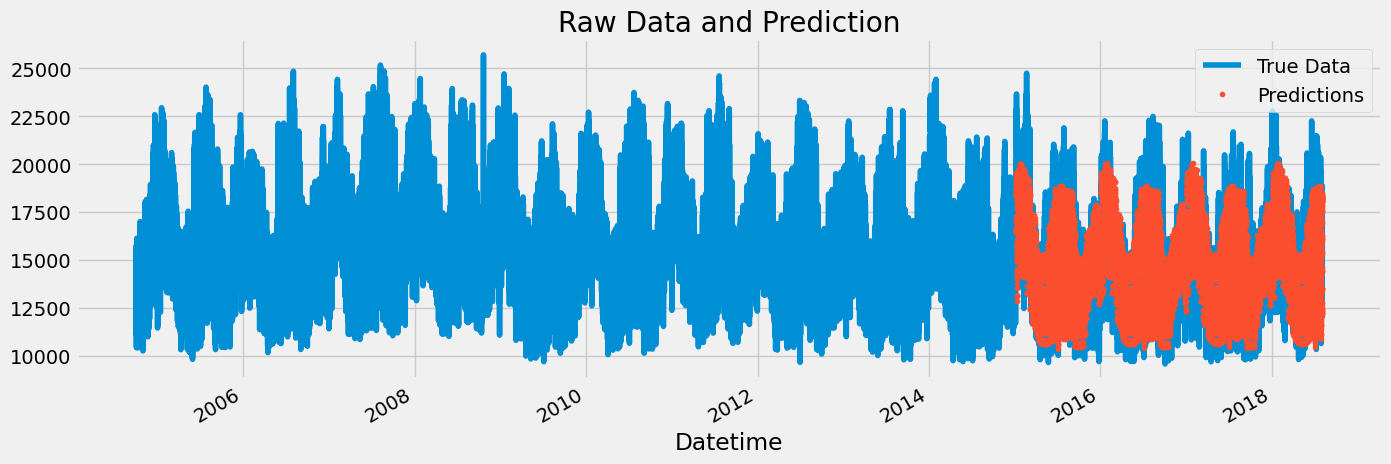

In [ ]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True) ## merging df
ax = df[['AEP_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

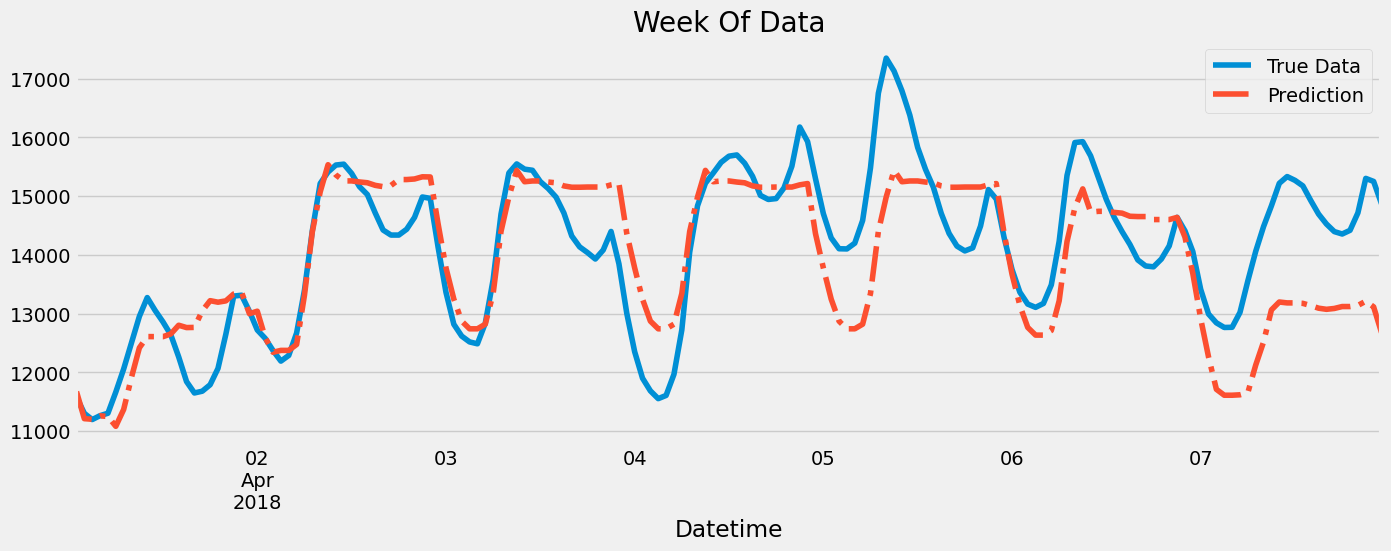

In [ ]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['AEP_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='-.')
plt.legend(['True Data','Prediction'])
plt.show()